# Assignment - Data Handling 2:

## Assignment Background:

This short assignment contains three sections of questions that build upon and incorporate methods, techniques and concepts taught and demonstrated in the lesson materials. Each section will explore your understanding of dictionaries, correct methods of importing, and iterations.

All questions aim to consider biological context. Timely submission will result in your assignment being returned within 14 days of the submission deadline. Marked Jupyter Notebook manuscripts will be returned with comments from your marker If you receive a pass or distinction, your marker will attach the model solutions for this assignment *via* the open pull request on your lesson's GitHub repository.

This assignment tests your knowledge of using Pandas to explore your datasets through plotting and correlation, as a component of multivariate analysis.

**Note:** In case of doubt, try to get help from the respective documentation available for [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.array.html), and [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

## Assignment Questions:

### Question 1

**A.**

Read in the breast cancer data set provided in [Data](../Data/) folder. Import this dataset using method `read_csv`.

Right click on the breast cancer csv file to copy the path if inside a CodeSpace or use "../Data/breast_cancer.csv" if not.

In [31]:
# keep all imported functions here

# To import data from a csv file into a Pandas dataframe
from pandas import read_csv

# Specific numpy functions, description in the main body
from numpy import corrcoef, fill_diagonal, arange, mean

# Import subplots and show from matplotlib
from matplotlib.pyplot import subplots, show

In [32]:
df_bc = read_csv("./Data/breast_cancer.csv")

**B.** 

 Get the summary (univariate) statistics of columns 2-10 using `describe`
- Use `.loc` not `.iloc`
    - To do so, use a slice of the column headers in a list
- Display the DataFrame rounded to 2 decimal places

In [34]:
columns_to_filter = df_bc.columns[1:10]

df_bc_describe = df_bc.loc[:, columns_to_filter].describe()

df_bc_describe.round(2)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  
count            569.00          569.00               569.00         569.00  
mean               0.10            0.09                 0.05           0.18  
std                0.05            0.08                 0.04           0.03  
min                0.02            0.00                 0.00           0.11  
25%                0.06            0.03                 0.02           0.16  
50%                0.09            0.06                 0.03           0.18  
75%                0.13            0.13                 0.07           0.20  
max                0.35            0.43                 0.20           0.30

### Question 2

**A.**

Plot the means of each column as a bar chart with standard deviations displayed as error bars.
- Try to add the standard deviation as an error bar, using the keyword argument `yerr`
    - Get the standard deviation from the describe dataframe
- For better visibility:
    - Rotate the x-axis labels with: `ax.tick_params(axis='x', labelrotation=-45)`
    - Set the y axis to log scale: `ax.set_yscale('log')`

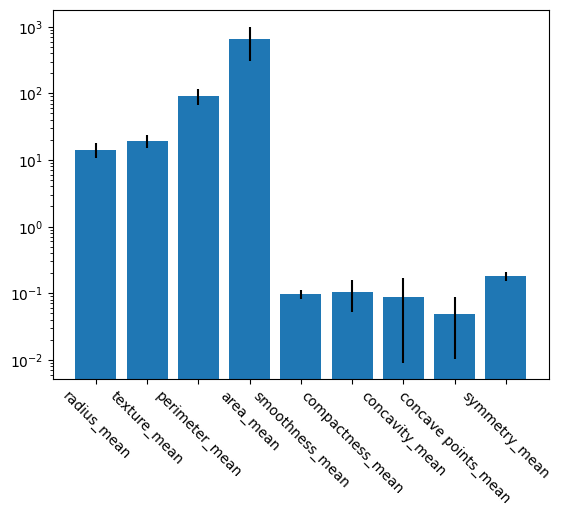

In [ ]:
fig, ax = subplots()

categories = df_bc_describe.columns

ax.bar(categories, df_bc_describe.loc['mean'], yerr=df_bc_describe.loc['std'])
ax.tick_params(axis='x', labelrotation=-45)
ax.set_yscale('log')

show()

### Question 3

**A.**

Extract the values of the original dataframe as a NumPy array 
- Use the `to_numpy` method
- Print the shape of the array

In [36]:
bc_numpy = df_bc.to_numpy()

bc_numpy.shape

(569, 31)

**B.**

Calculate the correlation matrix using `corrcoef` from NumPy, and plot it as a heatmap. 
    - The shape of the matrix should be (31, 31)
    - Use `fill_diagonal` to set the diagonal elements to 0
    - Include a colour bar in your plot with appropriate settings

In [37]:
bc_corr = corrcoef(bc_numpy, rowvar=False)

bc_corr.shape

(31, 31)

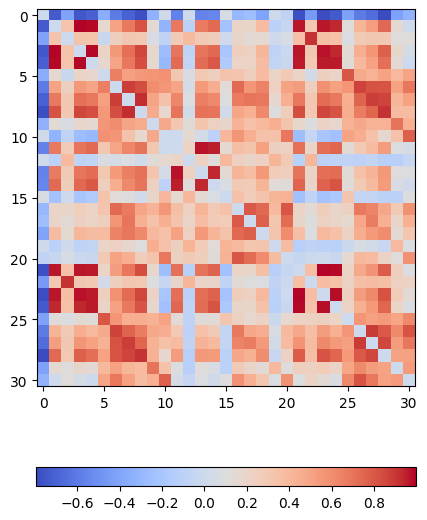

In [38]:
fill_diagonal(bc_corr, 0)

fig, ax = subplots(figsize=(7,7))

im = ax.imshow(bc_corr, cmap='coolwarm')

fig.colorbar(im, orientation='horizontal', shrink=0.7);

show()

### Question 4

**B.**

Calculate the average column correlation (absolute values) and plot it as a bar chart.
- Give the plot an appropriate title

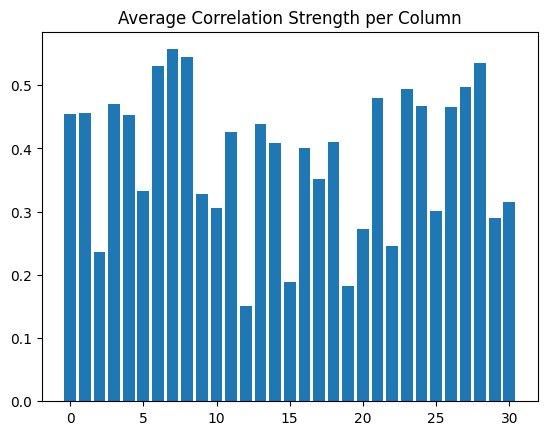

In [39]:
bc_column_average = mean(abs(bc_corr), axis=0)

fig, ax = subplots()

bins = arange(len(bc_column_average))

ax.bar(bins, bc_column_average)
ax.set_title('Average Correlation Strength per Column');

show()

**B.**

Calculate the average correlation strength of the dataset.
    - Round to 3 decimal places

In [40]:
# Average of the correlation strengths
bc_corr_matrix_average = mean(abs(bc_corr))

print('Average Correlation Strength: ', round(bc_corr_matrix_average, 3))

Average Correlation Strength:  0.387
